In [1]:
#Background

#The financial departments of large companies often have to make foreign currency transactions when doing international business, 
#while hedge funds are also interested in anything that will provide an edge in predicting currency movements. Hence, both are always eager to gain a better understanding of the future direction and risk of various currencies.

#In this assignment, you will test the many time series tools that you have learned in order to predict future movements in the value 
#of the Canadian dollar versus the Japanese yen. You will gain proficiency in the following tasks:

##Time series forecasting##

##Linear regression modelling##



In [2]:
###Files

##Time-Series Starter Notebook

##Linear Regression Starter Notebook

##CAD/JPY Data CSV File

In [3]:
#Instructions

In [4]:
#Time-Series Forecasting

#In this notebook, you will load historical CAD-JPY exchange rate data and apply time series analysis 
#and modelling to determine if there is any predictable behaviour.
#Follow the steps outlined in the time series starter notebook to complete the following:

In [5]:
#Imported the necessary Libraries

import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [6]:
# Read in data
cad_jpy_df = pd.read_csv(Path('../Downloads/cad_jpy.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True
 )

In [7]:
#show Data table
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [8]:
# Check info of Pandas DataFrame
cad_jpy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9966 entries, 1982-01-05 to 2020-06-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9966 non-null   float64
 1   Open    9966 non-null   float64
 2   High    9966 non-null   float64
 3   Low     9966 non-null   float64
dtypes: float64(4)
memory usage: 389.3 KB


In [9]:
 # Read in cad_jpy_data, parse dates, and set datetime index
cad_jpy_df2 = pd.read_csv(
    Path('../Downloads/cad_jpy.csv'), index_col="Date", infer_datetime_format=True,parse_dates=True
)

In [10]:
cad_jpy_df2.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [11]:
 # Trim the dataset to begin on January 1st, 1990
cad_jpy_df2 = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df2.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [12]:
#High_Price
cad_jpy_df2["Price"].max()

137.28

In [13]:
#Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.

#In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time 
#series analysis and modeling to determine whether there is any predictable behavior.

# Currency pair exchange rates for CAD/JPY


<AxesSubplot:xlabel='Date'>

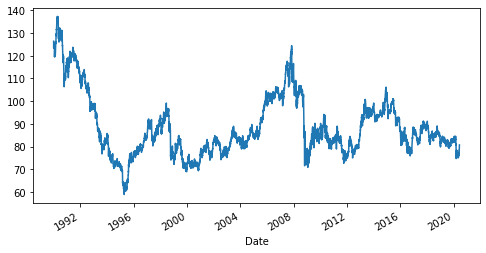

In [14]:
# Plot price data
cad_jpy_df2.Price.plot(figsize =(8,4))

# 1 Do you see any patterns, long-term and/or short?

# A.Yes. The CAD currency(loonie) has declined in value steadily against the JPY from 1990-2020.  

In [15]:
#Decomposition using a Hodrick-Prescott filter (decompose the settle price into trend and noise).

import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:

cad_jpy_noise, cad_jpy_trend = sm.tsa.filters.hpfilter(cad_jpy_df2['Price'])



In [16]:
# Create a dataframe of just the exchange rate price, 

#and add columns for "noise" and "trend" series from above:

cad_jpy_df3 = cad_jpy_df2 = pd.concat([cad_jpy_df2["Price"], cad_jpy_noise, cad_jpy_trend], axis=1)
cad_jpy_df3.head()

,Price,Price_cycle,Price_trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


In [17]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present.

#Setting the range to be plotted

cad_jpy_df3.loc["2015-01-01":"2020-01-01"].mean()

Price          86.156238
Price_cycle    -0.001003
Price_trend    86.157240
dtype: float64

Text(0.5, 1.0, 'Exchange Rate Price vs. Trend')

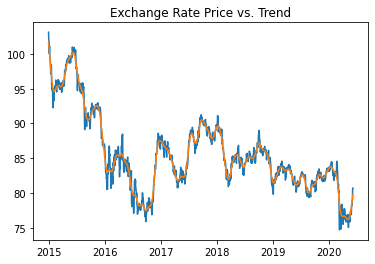

In [18]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present day as at 2020 (5yr)
plt.plot(cad_jpy_df3.loc["2015":, ["Price", "Price_trend"]])
plt.title("Exchange Rate Price vs. Trend")

Text(0.5, 1.0, 'Price Trend')

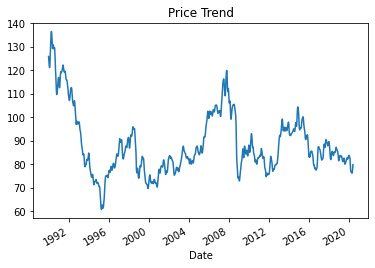

In [19]:
# Plot the trend independently
cad_jpy_trend.plot()
plt.title("Price Trend")

#Q2.  Do you see any patterns, long-term and/or short?

#A. Over the last 5yrs the buying power of the CDN Loonie relative to the JPY Yuan has decreased from a high point in 2015 ($1 lonnie buying 103 JPY), to a $1 CDN buying only 80 JPY.

Text(0.5, 1.0, 'Noise')

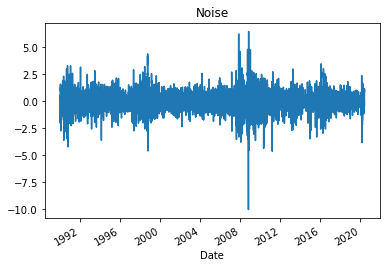

In [20]:
# Plot noise independently
cad_jpy_noise.plot()
plt.title("Noise")

In [21]:
#Forecasting returns using an ARIMA model.

#Using exchange rate Returns, estimate an ARMA model

#ARIMA: Create an ARIMA model and fit it to the returns data. 

###Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).###

#Output the ARIMA summary table and take note of the p-values of the lags. 

###Based on the p-values, is the model a good fit (p < 0.05)??????###

#Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [22]:
import statsmodels.api as sm

# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()
# 3 Based on the p-value, is the model a good fit?

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


Text(0.5, 1.0, 'Price Returns')

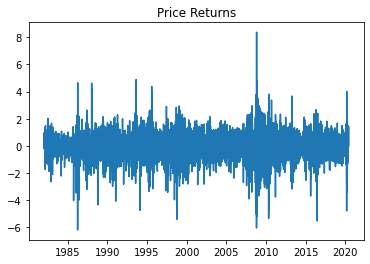

In [23]:
# Plotting price returns
plt.plot(returns["Price"])
plt.title("Price Returns")

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA model using statsmodels (use order=(2, 1))  ****Had to add another "1" for the model to run.****
# Fit the model and assign it to a variable called results
# Output model summary results:
model = ARIMA(returns.values, order=(2,1, 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9965
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11928.217
Date:                Mon, 13 Jun 2022   AIC                          23864.434
Time:                        18:23:33   BIC                          23893.261
Sample:                             0   HQIC                         23874.194
                               - 9965                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0238      0.006     -3.895      0.000      -0.036      -0.012
ar.L2         -0.0011      0.006     -0.193      0.847      -0.012       0.010
ma.L1         -0.9999      0.001  -1710.747      0.000      -1.001      -0.999
sigma2         0.6412      0.005    139.734      0.000       0.632       0.650
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             16998.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
#Forecasting returns using an ARMA model.

#Q. Based on the p-value, is the model a good fit? 

# A. For all but ar.L2 the P value is significant (under .50), for ar.L2 the P value is insignificant.

In [26]:
#Forecasting the Exchange Rate Price using an ARIMA Model
 
#Using the raw CAD/JPY exchange rate price, estimate an ARIMA model.

#Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags

#Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(cad_jpy_df[["Price"]], order=(5, 1, 1))

/Users/tylerscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tylerscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tylerscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
# Fit the model
results = model.fit()

In [28]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 9966
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -11738.221
Date:                Mon, 13 Jun 2022   AIC                          23490.441
Time:                        18:04:37   BIC                          23540.889
Sample:                             0   HQIC                         23507.520
                               - 9966                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0041      1.795     -0.002      0.998      -3.522       3.514
ar.L2          0.0120      0.016      0.750      0.454      -0.019       0.044
ar.L3          0.0085      0.023      0.370      0.711      -0.036       0.053
ar.L4          0.0150      0.017      0.904      0.366      -0.018       0.047
ar.L5          0.0038      0.028      0.137      0.891      -0.051       0.059
ma.L1         -0.0041      1.795     -0.002      0.998      -3.522       3.514
sigma2         0.6175      0.004    145.769      0.000       0.609       0.626
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18861.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/tylerscott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, '5 Day Exchange Rate Price Forecast')

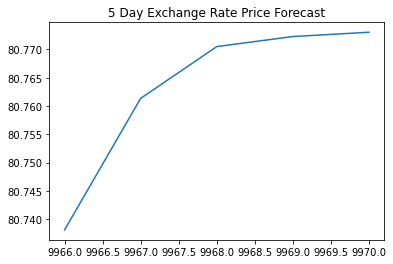

In [29]:
arima_forecast=pd.DataFrame(results.forecast(steps=5))
plt.plot(arima_forecast)
plt.title("5 Day Exchange Rate Price Forecast")

In [30]:
#Q: What does the model forecast will happen to the Japanese Yen in the near term?

#A:This model forecasts that over the next 5 days the CAD/JPY Exchange rate could have a positive result for the CDN dollar relative to the JPY Yuan.  CDN Loonie will/could buy more JPY. The value of the JPY is expected to decrease relative to the Loonie.


In [31]:
# Forecasting volatility with GARCH.

#Rather than predicting returns, let's forecast near-term volatility of Japanese Yen exchange rate returns. 
#Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.

#Using exchange rate Returns, estimate a GARCH model. Hint: You can reuse the returns variable from the ARMA model section.

#GARCH: Create an GARCH model and fit it to the returns data. 

#Note: Set the parameters to p=2 and q=1: order=(2, 1).

#Output the GARCH summary table and take note of the p-values of the lags. 

#Based on the p-values, is the model a good fit (p < 0.05)?

#Plot the 5-day forecast of the volatility.

# 5 What does the model forecast will happen to volatility in the near term?

from arch import arch_model

In [32]:
 # 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

In [33]:
res = model.fit(disp="off")

In [34]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10867.3
Distribution:                  Normal   AIC:                           21742.7
Method:            Maximum Likelihood   BIC:                           21771.5
                                        No. Observations:                 9965
Date:                Mon, Jun 13 2022   Df Residuals:                     9965
Time:                        18:04:37   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.6364e-03  2.912e-03      3.310  9.339e-04  [3.930e-03,1.534e-02]
alpha[1]       0.0675  1.661e-02      4.063  4.834e-05    [3.494e-02,  0.100]
alpha[2]   7.4117e-13  1.860e-02  3.985e-11      1.000 [-3.645e-02,3.645e-02]
beta[1]        0.9181  1.402e-02     65.490      0.000      [  0.891,  0.946]
=============================================================================

Covariance estimator: robust
"""

In [35]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [36]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = res.forecast(start=last_day, horizon=forecast_horizon)

In [37]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.443383,12.451102,12.458704,12.466192,12.473567


In [38]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.443383
h.2,12.451102
h.3,12.458704
h.4,12.466192
h.5,12.473567


Text(0.5, 1.0, 'GARCH Volatility Forecast')

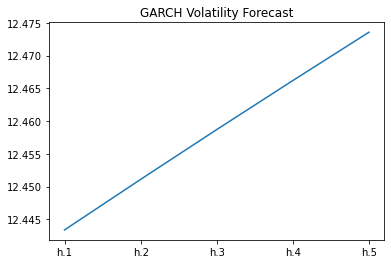

In [39]:
# Plot the final forecast
plt.plot(final)
plt.title("GARCH Volatility Forecast")

In [40]:
#Q: What does the model forecast will happen to volatility in the near term?

#Answer: The graph above suggests volitility is expected to rise, and/or there to be an increased amount of volitility between the loonie and JPY.

In [41]:
###Use the results of the completed time series analysis and modelling to answer the following questions:

# 1 Based on your time series analysis, would you buy the yen now?

# A. if I were to be bullish long on the JPY it may be a good time to buy given the recent strength of the CDN Loonie relative to the JPY.

# 2 Is the risk of the yen expected to increase or decrease? 

# A. The model appears to suggest that the value of the JPY may decrease when compared to the CDN Loonie as at the time of running this model.


# 3 Based on the model evaluation, would you feel confident in using these models for trading?

# A. I would use this model as a tool, but not the tool.  I would like to run additional analysis to affirm whether or not their additioanl support could be found.

In [42]:

# ****** Hints and Considerations  #*****#

#Out-of-sample data is data that the model hasn't seen before (testing data).
#In-sample data is data that the model was trained on (training data).


#Submission

#Use the starter Jupyter Notebooks for the time series and regression analyses and host the notebooks on 
#GitHub.

#Include a markdown that summarizes your models and findings and include this report in your GitHub repo.

#Submit the link to your GitHub project to Bootcampspot.



